<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week9/Day1/W9D1_XC_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('shopping_behavior_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Identify Key Topics: List 3 key points you want to explore related to e-commerce and consumers trends.

Key 3 Topics of My Research:
1. Portrait of the most profitable customers
2. Most popular look (color, items) in different locations
3. Customer Loyalty and Engagement

# Create prompts for ChatGPT to gather information on these topics.

1. Portrait of the most profitable customers

PROMPT: *Please conduct a detailed analysis of the demographics and purchase patterns of our most profitable customers. This should include an assessment of age groups, gender, and geographical locations that contribute the most to our revenue.*

2. Most popular look (color, items) in different locations

PROMPT: *Give some metrics about most popular look (color, items, etc) on ecah season in the different locations*


3. Customer Loyalty and Engagement

PROMPT: *Give the relationship between review ratings and repeat purchases. effectiveness of subscriptions on customer loyalty (frequency of purchases)*

# 3. Gather Responses: Use ChatGPT to execute these prompts and collect data.

## 1. Portrait of the most profitable customers

In [15]:



# 1. Revenue Contribution by Customer
top_spenders = df.groupby('Customer ID')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
top_spenders1 = top_spenders[:20]

# 2. Demographic Analysis
# Assuming the top 10% are considered 'top spenders', adjust the percentage as needed
top_spenders_ids = top_spenders.head(int(len(top_spenders) * 0.10)).index
top_spenders_demographics = df[df['Customer ID'].isin(top_spenders_ids)][['Customer ID', 'Age', 'Gender', 'Location']]
demographic_summary = top_spenders_demographics.groupby(['Age', 'Gender', 'Location']).size().reset_index(name='Count')
demographic_summary1 = demographic_summary[:20]

# 3. Item Category Preference
category_preferences = df[df['Customer ID'].isin(top_spenders_ids)]['Category'].value_counts()

# Displaying the results
print("Top Spenders:\n", top_spenders)
print("\nDemographic Summary:\n", demographic_summary)
print("\nCategory Preferences:\n", category_preferences)


Top Spenders:
 Customer ID
2843    100
96      100
582     100
1422    100
3838    100
       ... 
1705     20
295      20
978      20
509      20
2799     20
Name: Purchase Amount (USD), Length: 3900, dtype: int64

Demographic Summary:
      Age  Gender       Location  Count
0     18  Female         Kansas      1
1     18  Female         Nevada      1
2     18  Female       Oklahoma      1
3     18  Female   Pennsylvania      1
4     18    Male       Arkansas      1
..   ...     ...            ...    ...
371   70    Male    Connecticut      1
372   70    Male        Indiana      1
373   70    Male  Massachusetts      1
374   70    Male      Minnesota      1
375   70    Male         Nevada      1

[376 rows x 4 columns]

Category Preferences:
 Clothing       178
Accessories    120
Footwear        62
Outerwear       30
Name: Category, dtype: int64


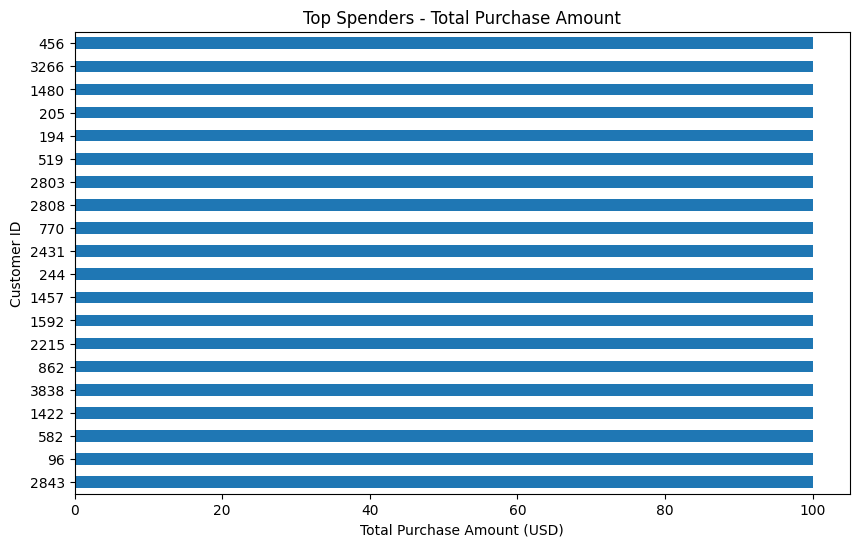

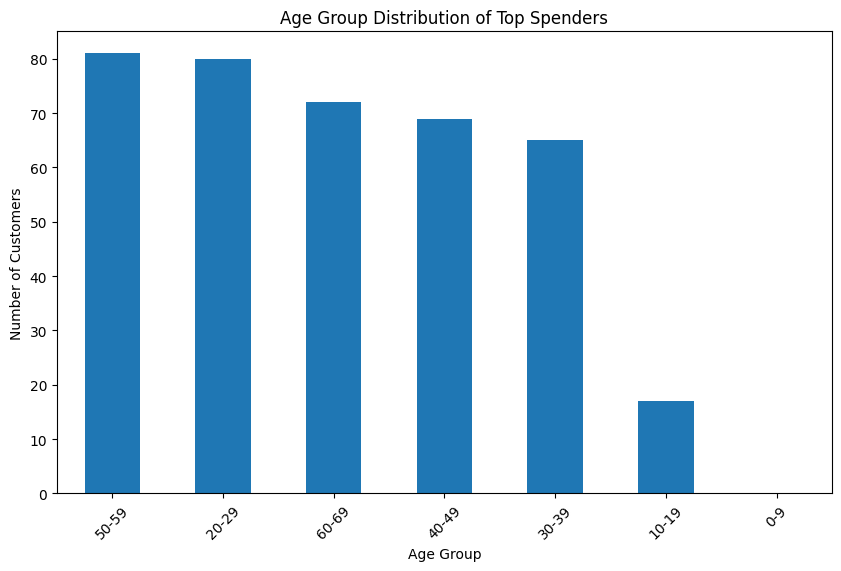

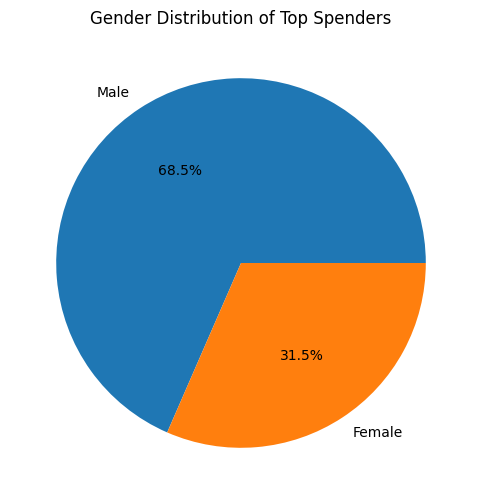

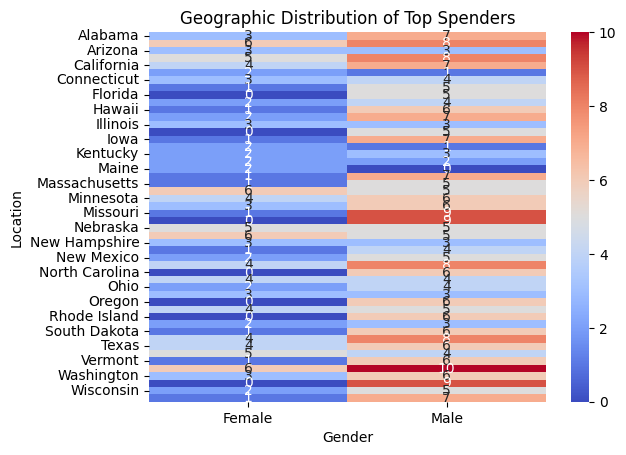

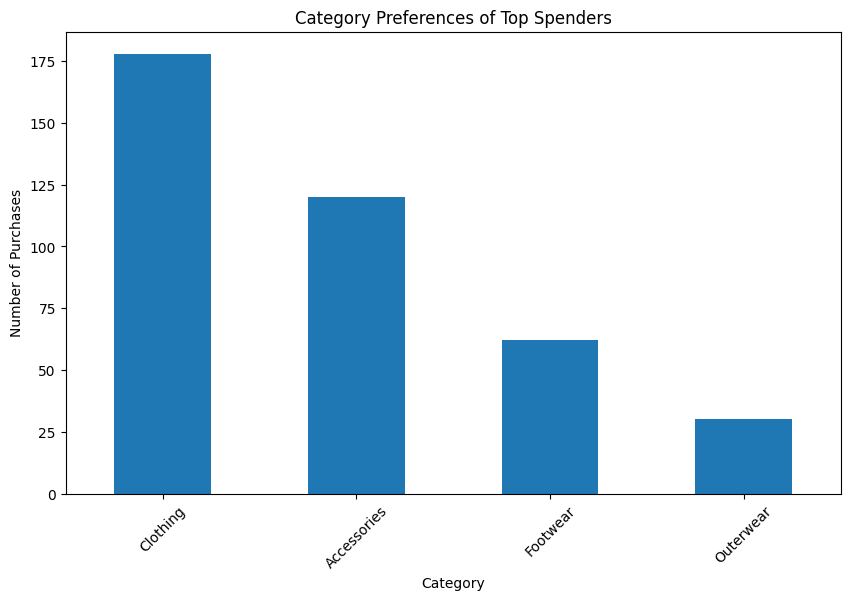

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your DataFrame 'df' and the analysis results ready

# Categorize ages into groups of 10 years
bins = range(0, df['Age'].max() + 10, 10)
labels = [f'{i}-{i+9}' for i in range(0, max(bins), 10)]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filtering data for top spenders
top_spenders_ids = top_spenders.head(int(len(top_spenders) * 0.10)).index
top_spenders_demographics = df[df['Customer ID'].isin(top_spenders_ids)]

# Visualization for Revenue Contribution by Customer
top_spenders1.plot(kind='barh', figsize=(10, 6))
plt.title('Top Spenders - Total Purchase Amount')
plt.xlabel('Total Purchase Amount (USD)')
plt.ylabel('Customer ID')
plt.show()

# Visualization for Demographic Analysis - Age Groups
age_group_distribution = top_spenders_demographics['Age Group'].value_counts()
age_group_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Age Group Distribution of Top Spenders')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Visualization for Demographic Analysis - Gender
top_spenders_demographics['Gender'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.title('Gender Distribution of Top Spenders')
plt.ylabel('')
plt.show()

# Heatmap for Geographic Distribution
heatmap_data = top_spenders_demographics.pivot_table(index="Location", columns="Gender", values="Customer ID", aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title('Geographic Distribution of Top Spenders')
plt.show()

# Visualization for Item Category Preference
category_preferences = top_spenders_demographics['Category'].value_counts()
category_preferences.plot(kind='bar', figsize=(10, 6))
plt.title('Category Preferences of Top Spenders')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()




## 2. Most popular look (color, items) in different locations
PROMPT: Give some metrics about most popular look (color, items, etc) on ecah season in the different locations

In [18]:
# a. Grouping by Location and Season
grouped_data = df.groupby(['Location', 'Season'])

# b. Most Popular Items
popular_items = grouped_data['Item Purchased'].agg(pd.Series.mode)

# c. Most Popular Colors
popular_colors = grouped_data['Color'].agg(pd.Series.mode)

# Displaying the results
print("Most Popular Items by Location and Season:\n", popular_items)
print("\nMost Popular Colors by Location and Season:\n", popular_colors)


Most Popular Items by Location and Season:
 Location   Season
Alabama    Fall                           Skirt
           Spring                          Coat
           Summer                           Hat
           Winter                        Blouse
Alaska     Fall      [Backpack, Sandals, Scarf]
                                ...            
Wisconsin  Winter                        Hoodie
Wyoming    Fall                           Shirt
           Spring        [Hoodie, Scarf, Skirt]
           Summer           [Jeans, Sunglasses]
           Winter              [Coat, Sneakers]
Name: Item Purchased, Length: 200, dtype: object

Most Popular Colors by Location and Season:
 Location   Season
Alabama    Fall          [Magenta, Silver]
           Spring           [Blue, Purple]
           Summer           [Indigo, Teal]
           Winter    [Gray, Olive, Yellow]
Alaska     Fall                      Olive
                             ...          
Wisconsin  Winter           [Silver, Te

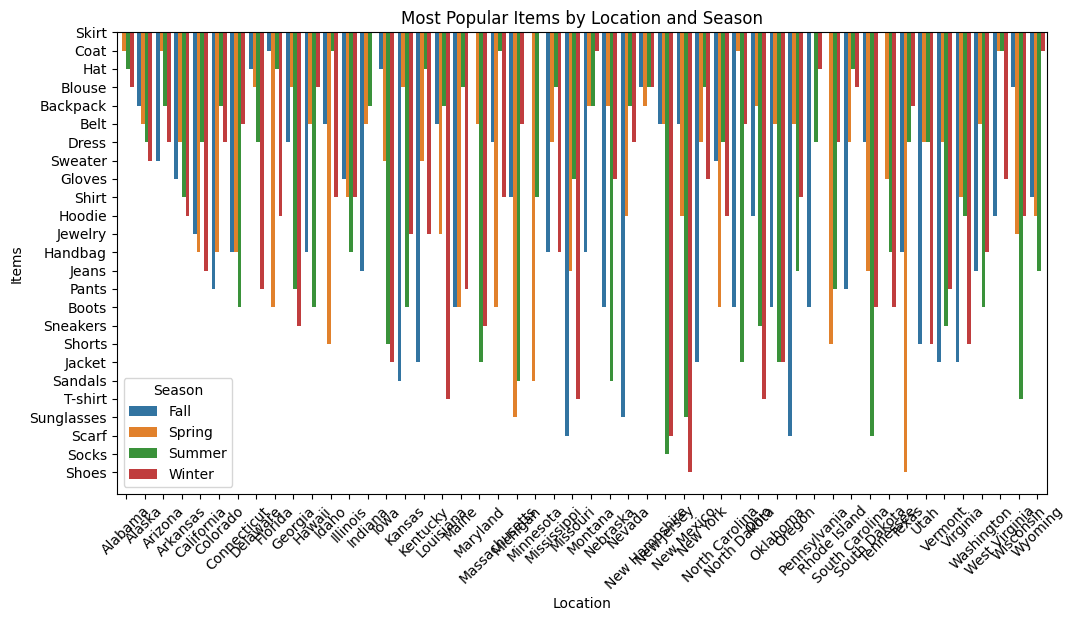

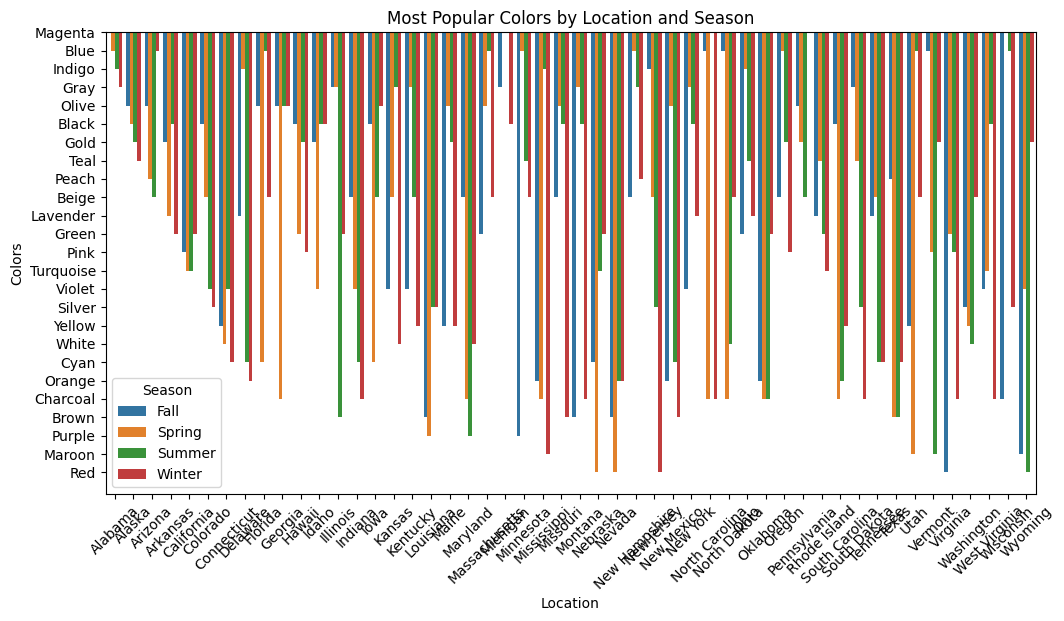

In [20]:
# Adjust the mode calculation to handle multiple modes
def get_first_mode(series):
    return series.mode()[0] if not series.mode().empty else None

grouped_data = df.groupby(['Location', 'Season'])
popular_items = grouped_data['Item Purchased'].apply(get_first_mode)
popular_colors = grouped_data['Color'].apply(get_first_mode)


# Convert to DataFrame for easier plotting
df_popular_items = popular_items.reset_index()
df_popular_colors = popular_colors.reset_index()

# Visualization for Most Popular Items
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Item Purchased', hue='Season', data=df_popular_items)
plt.title('Most Popular Items by Location and Season')
plt.xticks(rotation=45)
plt.ylabel('Items')
plt.xlabel('Location')
plt.legend(title='Season')
plt.show()

# Visualization for Most Popular Colors
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Color', hue='Season', data=df_popular_colors)
plt.title('Most Popular Colors by Location and Season')
plt.xticks(rotation=45)
plt.ylabel('Colors')
plt.xlabel('Location')
plt.legend(title='Season')
plt.show()



## 3. Customer Loyalty and Engagement

PROMPT: *Give the relationship between review ratings and repeat purchases. effectiveness of subscriptions on customer loyalty (frequency of purchases)*

In [21]:

# a. Review Ratings and Repeat Purchases
# Grouping by review rating and calculating the average number of previous purchases
rating_repeat_purchase = df.groupby('Review Rating')['Previous Purchases'].mean()

# b. Effectiveness of Subscriptions on Customer Loyalty
# Adding a column for whether the customer has a subscription or not
df['Has Subscription'] = df['Subscription Status'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
# Grouping by subscription status and calculating the average frequency of purchases
subscription_purchase_frequency = df.groupby('Has Subscription')['Frequency of Purchases'].value_counts(normalize=True)


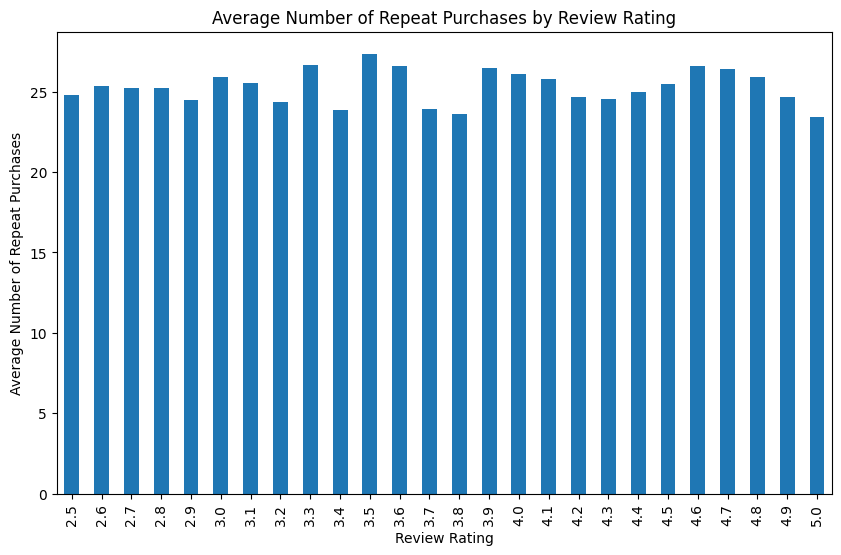

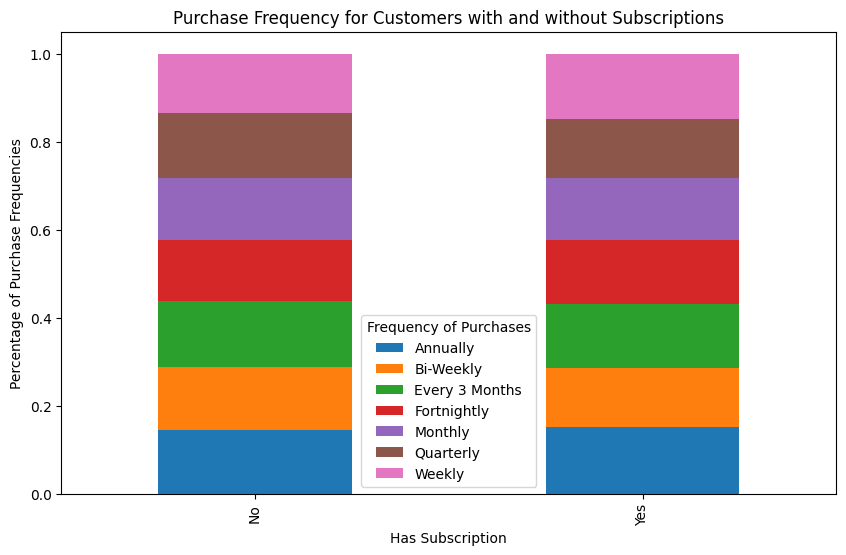

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Review Ratings and Repeat Purchases
rating_repeat_purchase.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Repeat Purchases by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Number of Repeat Purchases')
plt.show()

# Visualization for Effectiveness of Subscriptions on Customer Loyalty
subscription_purchase_frequency.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency for Customers with and without Subscriptions')
plt.xlabel('Has Subscription')
plt.ylabel('Percentage of Purchase Frequencies')
plt.legend(title='Frequency of Purchases')
plt.show()
